# Introduction to Neural Networks with Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.0


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.2.1


In [7]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.8


In [8]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

0.20.3


## Solving Iris with Neural Networks

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [10]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

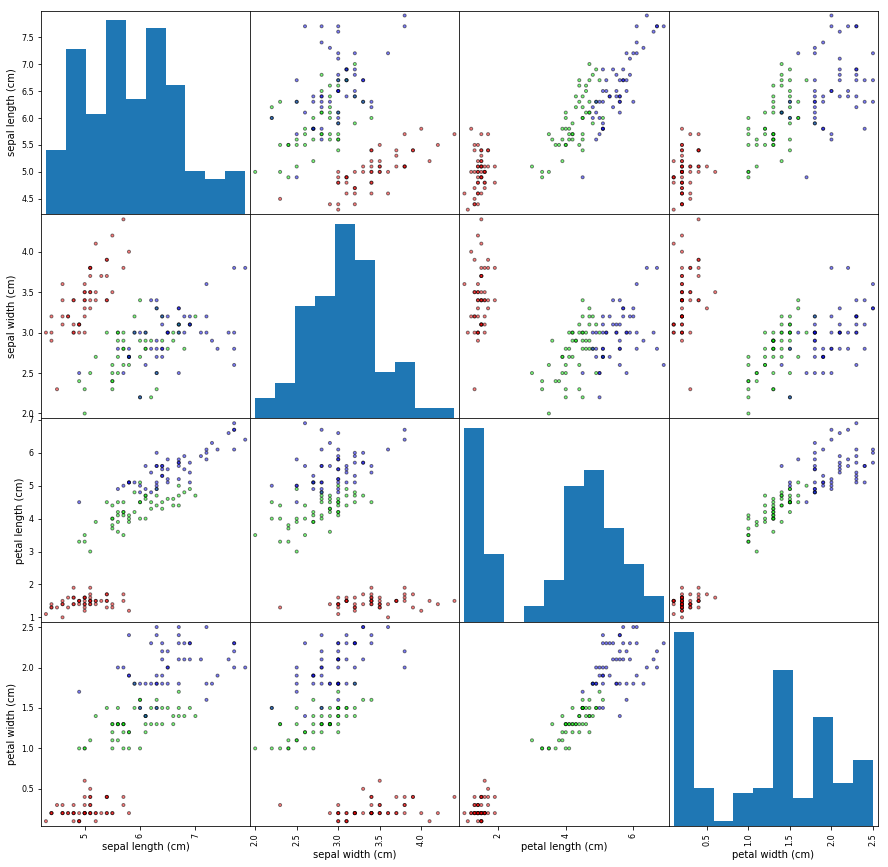

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
CMAP = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
pd.plotting.scatter_matrix(iris_df, c=iris.target, edgecolor='black', figsize=(15, 15), cmap=CMAP)
plt.show()

## The artificial Neuron
![The artificial Neuron](https://djcordhose.github.io/ai/img/sketch/neuron.jpg)

## Our first Neural Network with Keras
![From Neuron zu Net](https://djcordhose.github.io/ai/img/sketch/neuron_to_layers.jpg "Neuron zu Netz")

In [12]:
# keras.layers.Input?

In [13]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [14]:
# keras.layers.Dense?

In [15]:
from keras.layers import Dense
# just linear activation (like no activation function at all)
fc = Dense(3)(inputs)

In [16]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# this is just random stuff, no training has taken place so far
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 5.7693758 ,  1.25018001,  3.50801897]], dtype=float32)

### This is the output of all 3 hidden neurons, but what we really want is a category for iris category
* Softmax activation turns each output to a percantage between 0 and 1 all adding up to 1
* interpretation is likelyhood of category

![Fully Connected](https://djcordhose.github.io/ai/img/sketch/fc_nn.jpg "Fully Connected")

In [20]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.90537059,  0.00527649,  0.0893529 ]], dtype=float32)

## Now we have likelyhoods for categories, but still our model is totally random
# Training
* training is performed using Backpropagation
* each pair of ground truth input and output is passed through network
* difference between expected output (ground truth) and actual result is summed up and forms loss function
* loss function is to be minimized
* optimizer defines strategy to minimize loss

### Optimizers: Adam and RMSprop seem nice
![Behavior of Optimizers at Saddle Points](http://cs231n.github.io/assets/nn3/opt1.gif)
![Visualization of Optimizers](http://cs231n.github.io/assets/nn3/opt2.gif)
http://cs231n.github.io/neural-networks-3/#ada

In [24]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [25]:
y[100]

2

In [26]:
# tiny little pieces of feature engeneering
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [27]:
y[100]

array([ 0.,  0.,  1.])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [30]:
!rm -r tf_log
tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')

# https://keras.io/callbacks/#tensorboard
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [36]:
%time model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[tb_callback])
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/500
96/96 [==============================] - 0s - loss: 0.4120 - acc: 0.9062 - val_loss: 0.5058 - val_acc: 0.8333
Epoch 2/500
96/96 [==============================] - 0s - loss: 0.4112 - acc: 0.9062 - val_loss: 0.5047 - val_acc: 0.8333
Epoch 3/500
96/96 [==============================] - 0s - loss: 0.4105 - acc: 0.9062 - val_loss: 0.5040 - val_acc: 0.8333
Epoch 4/500
96/96 [==============================] - 0s - loss: 0.4098 - acc: 0.9062 - val_loss: 0.5032 - val_acc: 0.8333
Epoch 5/500
96/96 [==============================] - 0s - loss: 0.4091 - acc: 0.9062 - val_loss: 0.5020 - val_acc: 0.8333
Epoch 6/500
96/96 [==============================] - 0s - loss: 0.4084 - acc: 0.9062 - val_loss: 0.5009 - val_acc: 0.8333
Epoch 7/500
96/96 [==============================] - 0s - loss: 0.4077 - acc: 0.9062 - val_loss: 0.5003 - val_acc: 0.8333
Epoch 8/500
96/96 [==============================] - 0s - loss: 0.4069 - acc: 0.9062 - val_loss: 0.499

96/96 [==============================] - 0s - loss: 0.3667 - acc: 0.9271 - val_loss: 0.4510 - val_acc: 0.8750
Epoch 68/500
96/96 [==============================] - 0s - loss: 0.3661 - acc: 0.9271 - val_loss: 0.4500 - val_acc: 0.8750
Epoch 69/500
96/96 [==============================] - 0s - loss: 0.3653 - acc: 0.9271 - val_loss: 0.4493 - val_acc: 0.8750
Epoch 70/500
96/96 [==============================] - 0s - loss: 0.3650 - acc: 0.9271 - val_loss: 0.4489 - val_acc: 0.8750
Epoch 71/500
96/96 [==============================] - 0s - loss: 0.3646 - acc: 0.9271 - val_loss: 0.4475 - val_acc: 0.8750
Epoch 72/500
96/96 [==============================] - ETA: 0s - loss: 0.3566 - acc: 0.968 - 0s - loss: 0.3638 - acc: 0.9271 - val_loss: 0.4463 - val_acc: 0.8750
Epoch 73/500
96/96 [==============================] - 0s - loss: 0.3633 - acc: 0.9271 - val_loss: 0.4463 - val_acc: 0.8750
Epoch 74/500
96/96 [==============================] - 0s - loss: 0.3621 - acc: 0.9271 - val_loss: 0.4455 - val_acc

96/96 [==============================] - 0s - loss: 0.3256 - acc: 0.9479 - val_loss: 0.4006 - val_acc: 0.9583
Epoch 133/500
96/96 [==============================] - 0s - loss: 0.3249 - acc: 0.9479 - val_loss: 0.3998 - val_acc: 0.9583
Epoch 134/500
96/96 [==============================] - 0s - loss: 0.3244 - acc: 0.9479 - val_loss: 0.3993 - val_acc: 0.9583
Epoch 135/500
96/96 [==============================] - 0s - loss: 0.3240 - acc: 0.9479 - val_loss: 0.3983 - val_acc: 0.9583
Epoch 136/500
96/96 [==============================] - 0s - loss: 0.3232 - acc: 0.9479 - val_loss: 0.3974 - val_acc: 0.9583
Epoch 137/500
96/96 [==============================] - 0s - loss: 0.3231 - acc: 0.9479 - val_loss: 0.3972 - val_acc: 0.9583
Epoch 138/500
96/96 [==============================] - 0s - loss: 0.3218 - acc: 0.9479 - val_loss: 0.3964 - val_acc: 0.9583
Epoch 139/500
96/96 [==============================] - 0s - loss: 0.3213 - acc: 0.9479 - val_loss: 0.3956 - val_acc: 0.9583
Epoch 140/500
96/96 [=

96/96 [==============================] - 0s - loss: 0.2877 - acc: 0.9583 - val_loss: 0.3538 - val_acc: 0.9583
Epoch 198/500
96/96 [==============================] - 0s - loss: 0.2872 - acc: 0.9583 - val_loss: 0.3530 - val_acc: 0.9583
Epoch 199/500
96/96 [==============================] - 0s - loss: 0.2867 - acc: 0.9583 - val_loss: 0.3522 - val_acc: 0.9583
Epoch 200/500
96/96 [==============================] - 0s - loss: 0.2860 - acc: 0.9583 - val_loss: 0.3517 - val_acc: 0.9583
Epoch 201/500
96/96 [==============================] - 0s - loss: 0.2854 - acc: 0.9583 - val_loss: 0.3510 - val_acc: 0.9583
Epoch 202/500
96/96 [==============================] - 0s - loss: 0.2849 - acc: 0.9583 - val_loss: 0.3505 - val_acc: 0.9583
Epoch 203/500
96/96 [==============================] - 0s - loss: 0.2844 - acc: 0.9583 - val_loss: 0.3500 - val_acc: 0.9583
Epoch 204/500
96/96 [==============================] - 0s - loss: 0.2839 - acc: 0.9583 - val_loss: 0.3495 - val_acc: 0.9583
Epoch 205/500
96/96 [=

96/96 [==============================] - 0s - loss: 0.2532 - acc: 0.9688 - val_loss: 0.3111 - val_acc: 0.9583
Epoch 263/500
96/96 [==============================] - 0s - loss: 0.2529 - acc: 0.9688 - val_loss: 0.3104 - val_acc: 0.9583
Epoch 264/500
96/96 [==============================] - 0s - loss: 0.2522 - acc: 0.9688 - val_loss: 0.3098 - val_acc: 0.9583
Epoch 265/500
96/96 [==============================] - 0s - loss: 0.2517 - acc: 0.9688 - val_loss: 0.3092 - val_acc: 0.9583
Epoch 266/500
96/96 [==============================] - 0s - loss: 0.2513 - acc: 0.9688 - val_loss: 0.3086 - val_acc: 0.9583
Epoch 267/500
96/96 [==============================] - 0s - loss: 0.2508 - acc: 0.9688 - val_loss: 0.3080 - val_acc: 0.9583
Epoch 268/500
96/96 [==============================] - 0s - loss: 0.2502 - acc: 0.9688 - val_loss: 0.3074 - val_acc: 0.9583
Epoch 269/500
96/96 [==============================] - 0s - loss: 0.2499 - acc: 0.9688 - val_loss: 0.3069 - val_acc: 0.9583
Epoch 270/500
96/96 [=

96/96 [==============================] - 0s - loss: 0.2230 - acc: 0.9688 - val_loss: 0.2731 - val_acc: 0.9583
Epoch 328/500
96/96 [==============================] - 0s - loss: 0.2224 - acc: 0.9688 - val_loss: 0.2726 - val_acc: 0.9583
Epoch 329/500
96/96 [==============================] - 0s - loss: 0.2221 - acc: 0.9688 - val_loss: 0.2720 - val_acc: 0.9583
Epoch 330/500
96/96 [==============================] - 0s - loss: 0.2218 - acc: 0.9688 - val_loss: 0.2715 - val_acc: 0.9583
Epoch 331/500
96/96 [==============================] - 0s - loss: 0.2212 - acc: 0.9688 - val_loss: 0.2709 - val_acc: 0.9583
Epoch 332/500
96/96 [==============================] - 0s - loss: 0.2208 - acc: 0.9688 - val_loss: 0.2704 - val_acc: 0.9583
Epoch 333/500
96/96 [==============================] - 0s - loss: 0.2204 - acc: 0.9688 - val_loss: 0.2699 - val_acc: 0.9583
Epoch 334/500
96/96 [==============================] - 0s - loss: 0.2199 - acc: 0.9688 - val_loss: 0.2693 - val_acc: 0.9583
Epoch 335/500
96/96 [=

96/96 [==============================] - 0s - loss: 0.1968 - acc: 0.9688 - val_loss: 0.2404 - val_acc: 0.9583
Epoch 393/500
96/96 [==============================] - 0s - loss: 0.1965 - acc: 0.9688 - val_loss: 0.2399 - val_acc: 0.9583
Epoch 394/500
96/96 [==============================] - 0s - loss: 0.1962 - acc: 0.9688 - val_loss: 0.2395 - val_acc: 0.9583
Epoch 395/500
96/96 [==============================] - 0s - loss: 0.1964 - acc: 0.9688 - val_loss: 0.2388 - val_acc: 0.9583
Epoch 396/500
96/96 [==============================] - 0s - loss: 0.1955 - acc: 0.9688 - val_loss: 0.2385 - val_acc: 0.9583
Epoch 397/500
96/96 [==============================] - 0s - loss: 0.1951 - acc: 0.9688 - val_loss: 0.2380 - val_acc: 0.9583
Epoch 398/500
96/96 [==============================] - ETA: 0s - loss: 0.1656 - acc: 1.000 - 0s - loss: 0.1947 - acc: 0.9688 - val_loss: 0.2376 - val_acc: 0.9583
Epoch 399/500
96/96 [==============================] - 0s - loss: 0.1943 - acc: 0.9688 - val_loss: 0.2372 - 

96/96 [==============================] - 0s - loss: 0.1752 - acc: 0.9688 - val_loss: 0.2131 - val_acc: 1.0000
Epoch 458/500
96/96 [==============================] - 0s - loss: 0.1748 - acc: 0.9688 - val_loss: 0.2126 - val_acc: 1.0000
Epoch 459/500
96/96 [==============================] - 0s - loss: 0.1745 - acc: 0.9688 - val_loss: 0.2122 - val_acc: 1.0000
Epoch 460/500
96/96 [==============================] - 0s - loss: 0.1742 - acc: 0.9688 - val_loss: 0.2118 - val_acc: 1.0000
Epoch 461/500
96/96 [==============================] - 0s - loss: 0.1739 - acc: 0.9688 - val_loss: 0.2115 - val_acc: 1.0000
Epoch 462/500
96/96 [==============================] - 0s - loss: 0.1737 - acc: 0.9688 - val_loss: 0.2109 - val_acc: 1.0000
Epoch 463/500
96/96 [==============================] - 0s - loss: 0.1733 - acc: 0.9688 - val_loss: 0.2107 - val_acc: 1.0000
Epoch 464/500
96/96 [==============================] - 0s - loss: 0.1730 - acc: 0.9688 - val_loss: 0.2106 - val_acc: 1.0000
Epoch 465/500
96/96 [=

# Evaluation

In [32]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.93480259,  0.06045231,  0.00474514]], dtype=float32)

In [33]:
X[0], y[0]

(array([ 5.1,  3.5,  1.4,  0.2]), array([ 1.,  0.,  0.]))

In [37]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

 32/120 [=======>......................] - ETA: 0s

(0.16963374316692353, 0.97499999999999998)

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s


(0.16105984151363373, 0.96666663885116577)

---

# Hands-On
## Execute this notebook and improve the training results
* Are the results you see good?
* What kind of decision boundary can our neurons draw?
* Can you improve the results? Can you at least match Knn?
    * What is the total mimimum of neurons you need for this problem?
      * Play around with the number of neurons in the hidden layer
    * Add another hidden layer
      * More than one hidden layer is what people call deep neural networks
      * hidden layers close to the input hopefully do the feature engeneering and extraction for us
    * Increase the number of epochs for training  
---

# Stop Here

## Save Model in Keras und TensorFlow Format

In [39]:
# Keras format
model.save('nn-iris.hdf5')

## Export as raw tf model

* https://tensorflow.github.io/serving/serving_basic.html
* https://github.com/tensorflow/serving/blob/master/tensorflow_serving/example/mnist_saved_model.py

In [40]:
import os
from keras import backend as K

In [41]:
K.set_learning_phase(0)

In [42]:
sess = K.get_session()

In [43]:
!rm -r tf

rm: cannot remove 'tf': No such file or directory


In [44]:
tf.app.flags.DEFINE_integer('model_version', 1, 'version number of the model.')
tf.app.flags.DEFINE_string('work_dir', '/tmp', 'Working directory.')
FLAGS = tf.app.flags.FLAGS

In [45]:
export_path_base = 'tf'
export_path = os.path.join(
  tf.compat.as_bytes(export_path_base),
  tf.compat.as_bytes(str(FLAGS.model_version)))

In [46]:
classification_inputs = tf.saved_model.utils.build_tensor_info(model.input)
classification_outputs_scores = tf.saved_model.utils.build_tensor_info(model.output)

In [47]:
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def

In [48]:
signature = predict_signature_def(inputs={'inputs': model.input},
                                  outputs={'scores': model.output})

In [49]:
builder = tf.saved_model.builder.SavedModelBuilder(export_path)

In [50]:
builder.add_meta_graph_and_variables(
      sess, 
     tags=[tf.saved_model.tag_constants.SERVING],
      signature_def_map={
          tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature
      })

In [51]:
builder.save()

b'tf/1/saved_model.pb'

In [52]:
!ls -lhR tf

tf:
total 0
drwxrwxrwx 0 root root 512 Sep 28 21:36 1

tf/1:
total 55M
-rwxrwxrwx 1 root root 108K Sep 28 21:36 saved_model.pb
drwxrwxrwx 0 root root  512 Sep 28 21:36 variables

tf/1/variables:
total 577K
-rwxrwxrwx 1 root root 432 Sep 28 21:36 variables.data-00000-of-00001
-rwxrwxrwx 1 root root 719 Sep 28 21:36 variables.index


## This TensorFlow Modell can be uploaded to Google Cloud ML and called via REST interface

In [53]:
# cd tf
# gsutil cp -R 1 gs://irisnn
# create model and version at https://console.cloud.google.com/mlengine
# gcloud ml-engine predict --model=irisnn --json-instances=./sample_iris.json
# SCORES
# [0.9954029321670532, 0.004596732556819916, 3.3544753819114703e-07]